## Check GPU detected or not.

In [1]:
import torch
print(torch.__version__)  # Should print PyTorch version
print(torch.cuda.is_available())  # Should return True
print(torch.cuda.get_device_name(0))  # Should show NVIDIA RTX 3050

Microsoft Visual C++ Redistributable is not installed, this may lead to the DLL load failure.
It can be downloaded at https://aka.ms/vs/16/release/vc_redist.x64.exe
2.5.1+cu121
True
NVIDIA GeForce RTX 3050


## Train License Type Detection Model using YOLOv11

In [2]:
from ultralytics import YOLO
import torch

# Ensure CUDA is used
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")  # Should print "cuda"

# Load YOLO model onto GPU
model = YOLO("yolo11n.pt").to(device)

# Train the model on GPU
results = model.train(data="Self_Dataset\\data.yaml", epochs=100, imgsz=640, device=device)

Using device: cuda
New https://pypi.org/project/ultralytics/8.3.107 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.99  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=Self_Dataset\data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=N

train: Scanning C:\Users\ADMIN\Desktop\Project_ANPR\Self_Dataset\train\labels... 968 images, 1 backgrounds, 0 corrupt: 100%|██████████| 968/968 [00:00<00:00, 1289.46it/s]

train: New cache created: C:\Users\ADMIN\Desktop\Project_ANPR\Self_Dataset\train\labels.cache



val: Scanning C:\Users\ADMIN\Desktop\Project_ANPR\Self_Dataset\valid\labels... 242 images, 0 backgrounds, 0 corrupt: 100%|██████████| 242/242 [00:00<00:00, 580.21it/s]

val: New cache created: C:\Users\ADMIN\Desktop\Project_ANPR\Self_Dataset\valid\labels.cache


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.36G     0.8679      3.439      1.243         47        640: 100%|██████████| 61/61 [00:11<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.59it/s]

                   all        242        538      0.862      0.055       0.26      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.71G     0.9347      2.403      1.262         24        640: 100%|██████████| 61/61 [00:09<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.71it/s]

                   all        242        538      0.398      0.374      0.355      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.71G     0.9661      2.021      1.271         32        640: 100%|██████████| 61/61 [00:09<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.85it/s]

                   all        242        538      0.281      0.409        0.3      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.71G     0.9903      1.923      1.294         38        640: 100%|██████████| 61/61 [00:09<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.89it/s]

                   all        242        538      0.429      0.282      0.262      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.71G     0.9678       1.82       1.28         33        640: 100%|██████████| 61/61 [00:09<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.85it/s]

                   all        242        538      0.451      0.385      0.362      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.71G     0.9512      1.723      1.253         38        640: 100%|██████████| 61/61 [00:09<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.01it/s]

                   all        242        538      0.617      0.397      0.442      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.71G     0.9299      1.603      1.236         34        640: 100%|██████████| 61/61 [00:09<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.08it/s]

                   all        242        538      0.545      0.546      0.573      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.71G      0.936      1.539      1.256         26        640: 100%|██████████| 61/61 [00:09<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.15it/s]

                   all        242        538      0.628      0.507      0.568      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.71G     0.9079      1.449       1.23         30        640: 100%|██████████| 61/61 [00:09<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.22it/s]

                   all        242        538      0.701      0.611      0.666      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.71G     0.8794      1.378      1.212         47        640: 100%|██████████| 61/61 [00:09<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.97it/s]

                   all        242        538      0.654      0.607      0.633      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.71G     0.8698      1.377      1.204         24        640: 100%|██████████| 61/61 [00:09<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.29it/s]

                   all        242        538      0.599      0.538      0.586      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.71G     0.8386      1.286      1.181         30        640: 100%|██████████| 61/61 [00:09<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.31it/s]

                   all        242        538       0.77      0.561      0.678      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.71G     0.8713      1.259      1.191         27        640: 100%|██████████| 61/61 [00:09<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.24it/s]

                   all        242        538      0.619      0.642      0.667       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.71G     0.8506      1.226      1.182         22        640: 100%|██████████| 61/61 [00:09<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.12it/s]

                   all        242        538      0.605      0.655      0.628      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.71G     0.8241      1.186      1.173         30        640: 100%|██████████| 61/61 [00:09<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.07it/s]

                   all        242        538       0.68      0.598      0.654       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.71G     0.8175       1.16       1.16         23        640: 100%|██████████| 61/61 [00:09<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.36it/s]

                   all        242        538      0.709       0.64      0.726      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.71G     0.8105      1.115      1.149         23        640: 100%|██████████| 61/61 [00:09<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.10it/s]

                   all        242        538      0.672      0.645      0.689      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.71G      0.823      1.092      1.158         17        640: 100%|██████████| 61/61 [00:10<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.12it/s]

                   all        242        538      0.844       0.64      0.752      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.71G     0.7784      1.051      1.149         37        640: 100%|██████████| 61/61 [00:11<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.87it/s]


                   all        242        538      0.699      0.687      0.754       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.71G     0.8174      1.061      1.161         21        640: 100%|██████████| 61/61 [00:11<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.03it/s]

                   all        242        538      0.803      0.621      0.727      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.71G     0.7876      1.011       1.15         35        640: 100%|██████████| 61/61 [00:11<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.96it/s]


                   all        242        538      0.713      0.673      0.742      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.71G     0.7662     0.9999      1.136         24        640: 100%|██████████| 61/61 [00:11<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.96it/s]


                   all        242        538       0.76      0.752      0.791      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.71G     0.7493     0.9627       1.11         35        640: 100%|██████████| 61/61 [00:11<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.94it/s]


                   all        242        538      0.733      0.723      0.778      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.71G     0.7526     0.9368      1.124         34        640: 100%|██████████| 61/61 [00:11<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.00it/s]


                   all        242        538      0.675      0.721       0.76      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.71G     0.7735     0.9527      1.136         37        640: 100%|██████████| 61/61 [00:11<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.02it/s]

                   all        242        538       0.76      0.682      0.766      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.71G     0.7474     0.9238       1.12         24        640: 100%|██████████| 61/61 [00:11<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.96it/s]


                   all        242        538        0.8      0.712      0.783      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.71G     0.7467      0.877      1.104         29        640: 100%|██████████| 61/61 [00:11<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.01it/s]

                   all        242        538      0.735      0.693      0.756      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.71G     0.7398     0.8785      1.118         46        640: 100%|██████████| 61/61 [00:11<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.05it/s]

                   all        242        538      0.834      0.707      0.819      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.71G      0.733     0.8745      1.111         37        640: 100%|██████████| 61/61 [00:11<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.96it/s]


                   all        242        538      0.749      0.681      0.763      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.71G      0.719     0.8408      1.099         14        640: 100%|██████████| 61/61 [00:11<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.98it/s]

                   all        242        538      0.786      0.703      0.792      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.71G     0.7338     0.8368      1.109         22        640: 100%|██████████| 61/61 [00:11<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.17it/s]

                   all        242        538      0.748      0.702      0.787      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.71G     0.7257      0.832      1.103         25        640: 100%|██████████| 61/61 [00:11<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.94it/s]

                   all        242        538      0.755      0.711      0.778       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.71G     0.7364     0.8537      1.105         27        640: 100%|██████████| 61/61 [00:11<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.33it/s]

                   all        242        538      0.766      0.723      0.806      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.71G     0.6933     0.7806      1.073         32        640: 100%|██████████| 61/61 [00:09<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.08it/s]

                   all        242        538      0.774      0.746      0.795      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.71G     0.6945     0.7767      1.091         19        640: 100%|██████████| 61/61 [00:11<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.13it/s]

                   all        242        538      0.676      0.708      0.746      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.71G     0.6957     0.7947       1.08         38        640: 100%|██████████| 61/61 [00:11<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.14it/s]

                   all        242        538      0.733      0.773      0.825      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.71G     0.6906     0.7793      1.084         34        640: 100%|██████████| 61/61 [00:11<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.12it/s]

                   all        242        538      0.829      0.721      0.825      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.71G     0.6823     0.7833      1.075         23        640: 100%|██████████| 61/61 [00:09<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.24it/s]

                   all        242        538       0.82      0.737       0.81      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.71G     0.6727     0.7499      1.075         27        640: 100%|██████████| 61/61 [00:09<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.27it/s]

                   all        242        538       0.83      0.691       0.79      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.71G     0.6531     0.7335      1.064         23        640: 100%|██████████| 61/61 [00:11<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.96it/s]


                   all        242        538      0.829      0.705      0.817      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.71G     0.6616     0.7501      1.061         21        640: 100%|██████████| 61/61 [00:11<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.37it/s]

                   all        242        538      0.876      0.724      0.846      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.71G     0.6589     0.7346       1.06         24        640: 100%|██████████| 61/61 [00:09<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.47it/s]

                   all        242        538      0.813      0.746      0.812      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.71G     0.6604     0.7072      1.047         31        640: 100%|██████████| 61/61 [00:09<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.46it/s]

                   all        242        538       0.76      0.766      0.814      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.71G     0.6714     0.7319       1.08         24        640: 100%|██████████| 61/61 [00:09<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.38it/s]

                   all        242        538      0.786      0.735       0.83       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.71G     0.6468     0.6957      1.047         27        640: 100%|██████████| 61/61 [00:09<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.31it/s]

                   all        242        538      0.845      0.757      0.843      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.71G     0.6482     0.7058      1.052         26        640: 100%|██████████| 61/61 [00:09<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.34it/s]

                   all        242        538       0.83      0.743      0.823      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.71G     0.6503     0.6849      1.056         32        640: 100%|██████████| 61/61 [00:09<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.32it/s]

                   all        242        538      0.793      0.748      0.787      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.71G     0.6415     0.6727      1.055         32        640: 100%|██████████| 61/61 [00:09<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.39it/s]

                   all        242        538      0.766      0.779      0.816      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.71G     0.6312     0.6539      1.046         28        640: 100%|██████████| 61/61 [00:09<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.41it/s]

                   all        242        538      0.847      0.703      0.804       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.71G     0.6253     0.6751      1.037         36        640: 100%|██████████| 61/61 [00:09<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.48it/s]

                   all        242        538      0.788      0.767      0.833      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.71G      0.607     0.6313      1.027         30        640: 100%|██████████| 61/61 [00:09<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.45it/s]

                   all        242        538      0.837      0.748      0.838      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.71G     0.6124     0.6571      1.042         21        640: 100%|██████████| 61/61 [00:09<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.37it/s]

                   all        242        538      0.863       0.75      0.845      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.71G     0.6079     0.6452      1.032         51        640: 100%|██████████| 61/61 [00:09<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.50it/s]

                   all        242        538      0.774      0.793      0.839      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.71G     0.6115     0.6246      1.039         22        640: 100%|██████████| 61/61 [00:09<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.46it/s]

                   all        242        538      0.867      0.795      0.866       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.71G     0.6255     0.6371      1.051         30        640: 100%|██████████| 61/61 [00:09<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.42it/s]

                   all        242        538      0.864      0.746      0.851      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.71G     0.6088     0.6204      1.022         24        640: 100%|██████████| 61/61 [00:09<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.44it/s]

                   all        242        538      0.796      0.797      0.841      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.71G     0.5909     0.5855      1.024         43        640: 100%|██████████| 61/61 [00:09<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.37it/s]

                   all        242        538      0.824      0.749      0.831      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.71G      0.599     0.6147      1.028         46        640: 100%|██████████| 61/61 [00:09<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.29it/s]

                   all        242        538      0.806      0.788      0.852      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.71G     0.5992     0.6127      1.033         35        640: 100%|██████████| 61/61 [00:09<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.23it/s]

                   all        242        538      0.796      0.798       0.86      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.71G     0.5803     0.5907      1.017         39        640: 100%|██████████| 61/61 [00:09<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.31it/s]

                   all        242        538      0.852      0.747      0.846      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.71G     0.5938     0.6032      1.023         23        640: 100%|██████████| 61/61 [00:09<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.49it/s]

                   all        242        538      0.849      0.743      0.828      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.71G     0.5674     0.5804      1.016         22        640: 100%|██████████| 61/61 [00:09<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.40it/s]

                   all        242        538      0.832      0.746      0.849      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.71G     0.5795     0.5826      1.018         29        640: 100%|██████████| 61/61 [00:09<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.42it/s]

                   all        242        538       0.83      0.756      0.854      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.71G     0.5576     0.5456      1.006         31        640: 100%|██████████| 61/61 [00:09<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.30it/s]

                   all        242        538       0.81      0.805      0.851       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.71G     0.5673     0.5635      1.007         35        640: 100%|██████████| 61/61 [00:09<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.35it/s]

                   all        242        538       0.85      0.779      0.857      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.71G      0.558     0.5543     0.9967         26        640: 100%|██████████| 61/61 [00:09<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.26it/s]

                   all        242        538       0.82      0.757      0.843      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.71G     0.5602     0.5414      1.003         41        640: 100%|██████████| 61/61 [00:09<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.33it/s]

                   all        242        538      0.831      0.811       0.86      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.71G     0.5628      0.556      1.011         27        640: 100%|██████████| 61/61 [00:09<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.35it/s]

                   all        242        538      0.834       0.77      0.852      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.71G     0.5564      0.546      1.002         35        640: 100%|██████████| 61/61 [00:09<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.26it/s]

                   all        242        538      0.781      0.826      0.856      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.71G     0.5576     0.5316      1.006         38        640: 100%|██████████| 61/61 [00:09<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.24it/s]

                   all        242        538      0.824      0.778      0.839       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.71G     0.5439     0.5211      1.004         41        640: 100%|██████████| 61/61 [00:11<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.15it/s]

                   all        242        538      0.846      0.729      0.844      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.71G     0.5414     0.5286     0.9959         28        640: 100%|██████████| 61/61 [00:09<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.21it/s]

                   all        242        538      0.888      0.753      0.854      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.71G     0.5502     0.5284     0.9894         38        640: 100%|██████████| 61/61 [00:09<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.46it/s]

                   all        242        538      0.821      0.798      0.857      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.71G     0.5483     0.5368      1.013         23        640: 100%|██████████| 61/61 [00:09<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.10it/s]

                   all        242        538      0.868       0.79      0.877      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.71G     0.5338      0.518     0.9915         51        640: 100%|██████████| 61/61 [00:09<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.33it/s]

                   all        242        538      0.868      0.814      0.868      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.71G     0.5395     0.5144     0.9926         29        640: 100%|██████████| 61/61 [00:09<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.27it/s]

                   all        242        538      0.854      0.797      0.875      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.71G     0.5321      0.501     0.9967         13        640: 100%|██████████| 61/61 [00:10<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.17it/s]

                   all        242        538      0.864      0.792      0.869      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.71G     0.5295     0.5041     0.9922         27        640: 100%|██████████| 61/61 [00:11<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.97it/s]

                   all        242        538      0.831      0.809      0.858      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.71G     0.5127     0.4883     0.9801         27        640: 100%|██████████| 61/61 [00:12<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.85it/s]


                   all        242        538      0.916      0.754      0.868      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.71G     0.5262     0.5063     0.9962         22        640: 100%|██████████| 61/61 [00:11<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.43it/s]

                   all        242        538      0.871      0.798      0.868       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.71G     0.5241     0.4905     0.9809         30        640: 100%|██████████| 61/61 [00:10<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.93it/s]

                   all        242        538      0.848      0.789      0.862       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.71G     0.5192     0.4816     0.9958         30        640: 100%|██████████| 61/61 [00:11<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.95it/s]

                   all        242        538      0.846      0.786      0.862      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.71G     0.5029     0.4806     0.9782         18        640: 100%|██████████| 61/61 [00:11<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.87it/s]


                   all        242        538       0.84      0.797      0.863      0.721

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.71G     0.5197     0.4772     0.9852         26        640: 100%|██████████| 61/61 [00:12<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.96it/s]


                   all        242        538      0.854      0.767      0.864      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.71G     0.5085     0.4794     0.9711         25        640: 100%|██████████| 61/61 [00:12<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.00it/s]

                   all        242        538       0.85      0.802      0.856      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.71G     0.5029     0.4671     0.9738         26        640: 100%|██████████| 61/61 [00:11<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.05it/s]

                   all        242        538      0.855      0.756      0.858      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.71G     0.5053     0.4581     0.9828         19        640: 100%|██████████| 61/61 [00:11<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.10it/s]

                   all        242        538      0.853      0.766       0.85      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.71G     0.5034     0.4556     0.9805         34        640: 100%|██████████| 61/61 [00:11<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.10it/s]

                   all        242        538      0.852      0.793      0.858      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.71G     0.4989     0.4566     0.9636         42        640: 100%|██████████| 61/61 [00:11<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.95it/s]


                   all        242        538      0.828       0.81      0.851      0.714

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.71G     0.4944     0.4694     0.9789         23        640: 100%|██████████| 61/61 [00:11<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.09it/s]

                   all        242        538      0.873      0.783      0.848      0.712


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.71G     0.4576     0.3948     0.9218         17        640: 100%|██████████| 61/61 [00:12<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.83it/s]

                   all        242        538      0.816      0.821      0.853       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.71G     0.4388     0.3691     0.9123         13        640: 100%|██████████| 61/61 [00:12<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.85it/s]

                   all        242        538      0.884      0.781      0.862      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.71G     0.4236     0.3431     0.9013         20        640: 100%|██████████| 61/61 [00:12<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.85it/s]

                   all        242        538      0.862      0.788      0.853      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.71G     0.4208     0.3459     0.8991         13        640: 100%|██████████| 61/61 [00:12<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.00it/s]

                   all        242        538      0.859       0.81      0.862      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.71G      0.426     0.3466     0.9027         12        640: 100%|██████████| 61/61 [00:11<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.03it/s]

                   all        242        538      0.861      0.815      0.866      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.71G     0.4202     0.3344     0.9024         15        640: 100%|██████████| 61/61 [00:11<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.04it/s]

                   all        242        538      0.851      0.824      0.863      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.71G     0.4178     0.3364      0.904         16        640: 100%|██████████| 61/61 [00:11<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.93it/s]

                   all        242        538      0.862      0.809      0.864      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.71G      0.413       0.33     0.9016         13        640: 100%|██████████| 61/61 [00:12<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.91it/s]

                   all        242        538      0.858      0.822      0.865      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.71G     0.4078     0.3206     0.8909         30        640: 100%|██████████| 61/61 [00:12<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.82it/s]

                   all        242        538      0.866      0.809      0.863      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.71G     0.4005     0.3198     0.8966         10        640: 100%|██████████| 61/61 [00:11<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.37it/s]

                   all        242        538      0.857      0.804      0.864      0.724



100 epochs completed in 0.353 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 5.5MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics 8.3.99  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
YOLO11n summary (fused): 100 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.33it/s]


                   all        242        538      0.856      0.804      0.864      0.725
             Ambulance         29         33      0.972       0.97      0.994      0.929
                  Bike         33         42      0.762      0.738      0.797      0.646
                   Bus         35         37      0.942      0.784      0.898      0.782
                   Car         73        127      0.778      0.827      0.807      0.648
         License_Plate        127        211      0.938      0.783      0.887      0.709
              Rickshaw         32         36      0.828      0.694      0.825      0.681
               Tractor         23         23      0.849      0.913      0.899      0.688
                 Truck         26         29       0.78      0.724      0.801      0.713
Speed: 0.4ms preprocess, 2.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\detect\train2


In [3]:
from ultralytics import YOLO

Microsoft Visual C++ Redistributable is not installed, this may lead to the DLL load failure.
It can be downloaded at https://aka.ms/vs/16/release/vc_redist.x64.exe


# Check Model's Accuracy

In [4]:
model = YOLO("C:\\Users\\ADMIN\\Desktop\\Project_ANPR\\runs\\detect\\train2\\weights\\best.pt")
metrics = model.val(data="Self_Dataset/data.yaml")  # Returns a dictionary of metrics

print(metrics)  # Optional to inspect in code

Ultralytics 8.3.99  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
YOLO11n summary (fused): 100 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning C:\Users\ADMIN\Desktop\Project_ANPR\Self_Dataset\valid\labels.cache... 242 images, 0 backgrounds, 0 corrupt: 100%|██████████| 242/242 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.35it/s]


                   all        242        538       0.86      0.808      0.864      0.724
             Ambulance         29         33      0.971       0.97      0.994      0.926
                  Bike         33         42      0.762      0.738      0.797      0.645
                   Bus         35         37      0.944      0.784      0.897      0.777
                   Car         73        127      0.778      0.827      0.807      0.651
         License_Plate        127        211      0.938      0.783      0.889      0.708
              Rickshaw         32         36      0.829      0.694      0.825      0.679
               Tractor         23         23      0.878      0.943      0.902      0.689
                 Truck         26         29      0.779      0.724      0.801      0.714
Speed: 0.7ms preprocess, 4.7ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs\detect\val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array(

# Visualize confusion matrix

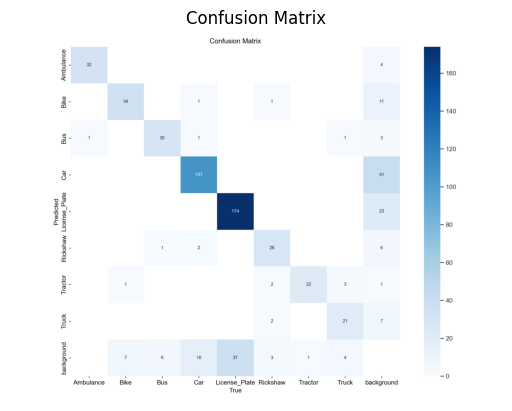

In [1]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open("runs/detect/val/confusion_matrix.png")
plt.imshow(img)
plt.axis('off')
plt.title("Confusion Matrix")
plt.show()



image 1/1 c:\Users\ADMIN\Desktop\Project_ANPR\Test_images\image_10.png: 384x640 1 Ambulance, 3 Bikes, 1 Car, 2 Rickshaws, 1 Truck, 6.9ms
Speed: 1.0ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


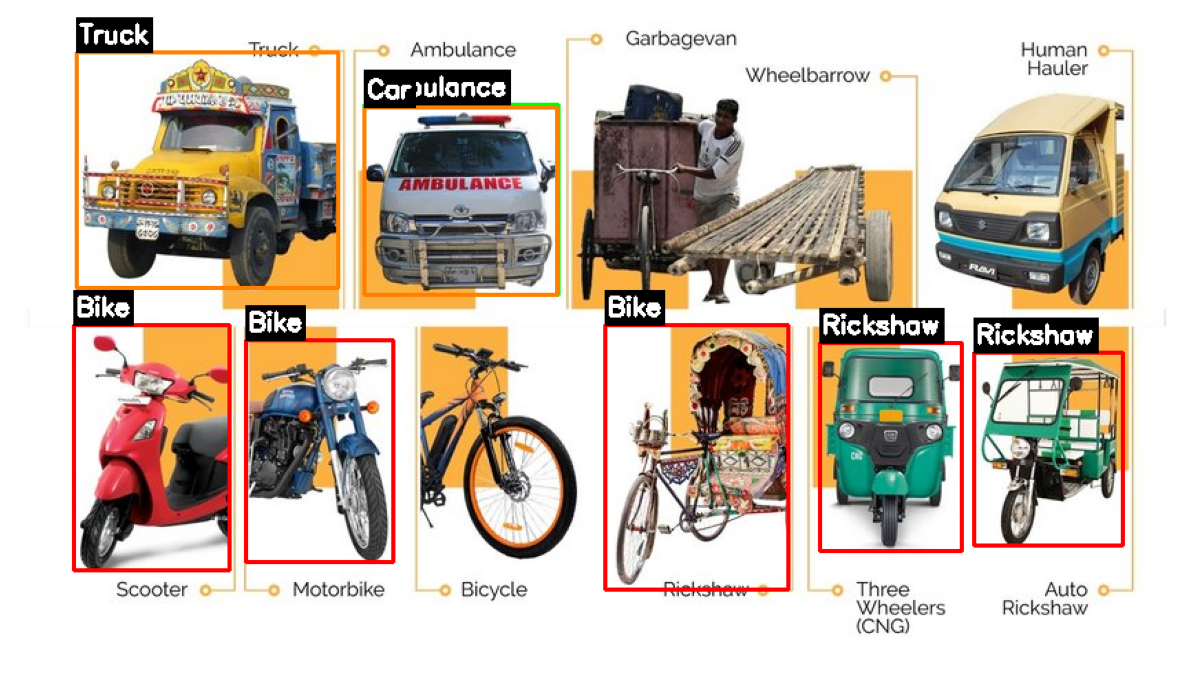

In [26]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load model
model = YOLO("C:\\Users\\ADMIN\\Desktop\\Project_ANPR\\runs\\detect\\train2\\weights\\best.pt")

# Load image
image_path = "Test_images\image_10.png"
results = model(image_path)

# Load and convert image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Optional: define colors for different classes (only one here, but scalable)
COLORS = [(0, 255, 0), (255, 0, 0), (0, 128, 255), (255, 128, 0)]

for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = float(box.conf[0])
        cls = int(box.cls[0])
        label = f"{model.names[cls]}"
        #{conf:.2f}"

        # Draw bounding box
        color = COLORS[cls % len(COLORS)]
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

        # Create a filled rectangle for the label background
        (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 1)
        label_bg_color = (0, 0, 0)
        cv2.rectangle(image, (x1, y1 - 25), (x1 + w + 4, y1), label_bg_color, -1)

        # Put label text above the box
        cv2.putText(image, label, (x1 + 2, y1 - 7), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

# Show the result
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis("off")
plt.tight_layout()
plt.show()



image 1/1 c:\Users\ADMIN\Desktop\Project_ANPR\Test_images\image_15.jpg: 480x640 1 Ambulance, 1 Car, 2 License_Plates, 44.0ms
Speed: 1.9ms preprocess, 44.0ms inference, 3.8ms postprocess per image at shape (1, 3, 480, 640)


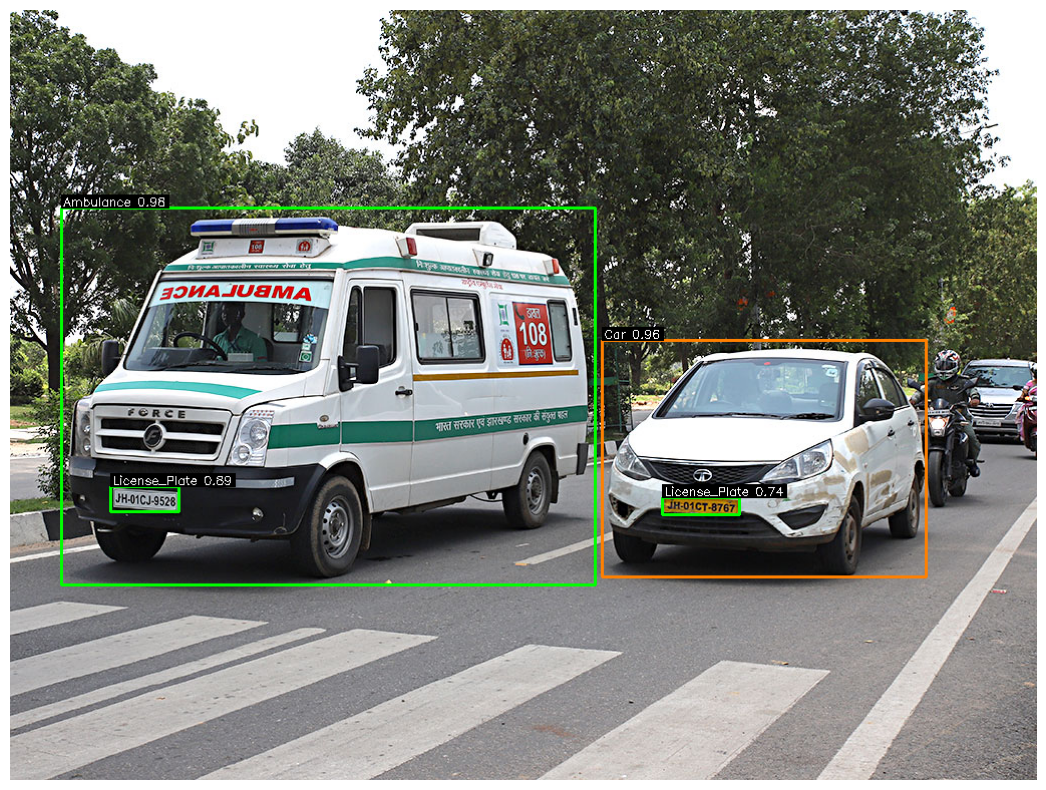

In [29]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load model
model = YOLO("C:\\Users\\ADMIN\\Desktop\\Project_ANPR\\runs\\detect\\train2\\weights\\best.pt")

# Load image
image_path = "Test_images/image_15.jpg"
results = model(image_path)

# Load and convert image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Optional: define colors for different classes (only one here, but scalable)
COLORS = [(0, 255, 0), (255, 0, 0), (0, 128, 255), (255, 128, 0)]

for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = float(box.conf[0])
        cls = int(box.cls[0])
        label = f"{model.names[cls]} {conf:.2f}"

        # Draw bounding box
        color = COLORS[cls % len(COLORS)]
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

        # Create a filled rectangle for the label background
               # Create a filled rectangle for the label background
        (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.4, 1)
        label_bg_color = (0, 0, 0)
        padding = 4  # slight padding around the text
        cv2.rectangle(image, (x1, y1 - h - padding), (x1 + w + padding, y1), label_bg_color, -1)

        # Put label text above the box
        cv2.putText(image, label, (x1 + 2, y1 - 2), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)


# Show the result
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis("off")
plt.tight_layout()
plt.show()



image 1/1 c:\Users\ADMIN\Desktop\Project_ANPR\Test_images\image_8.jpg: 448x640 5 Cars, 3 License_Plates, 7.7ms
Speed: 1.3ms preprocess, 7.7ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


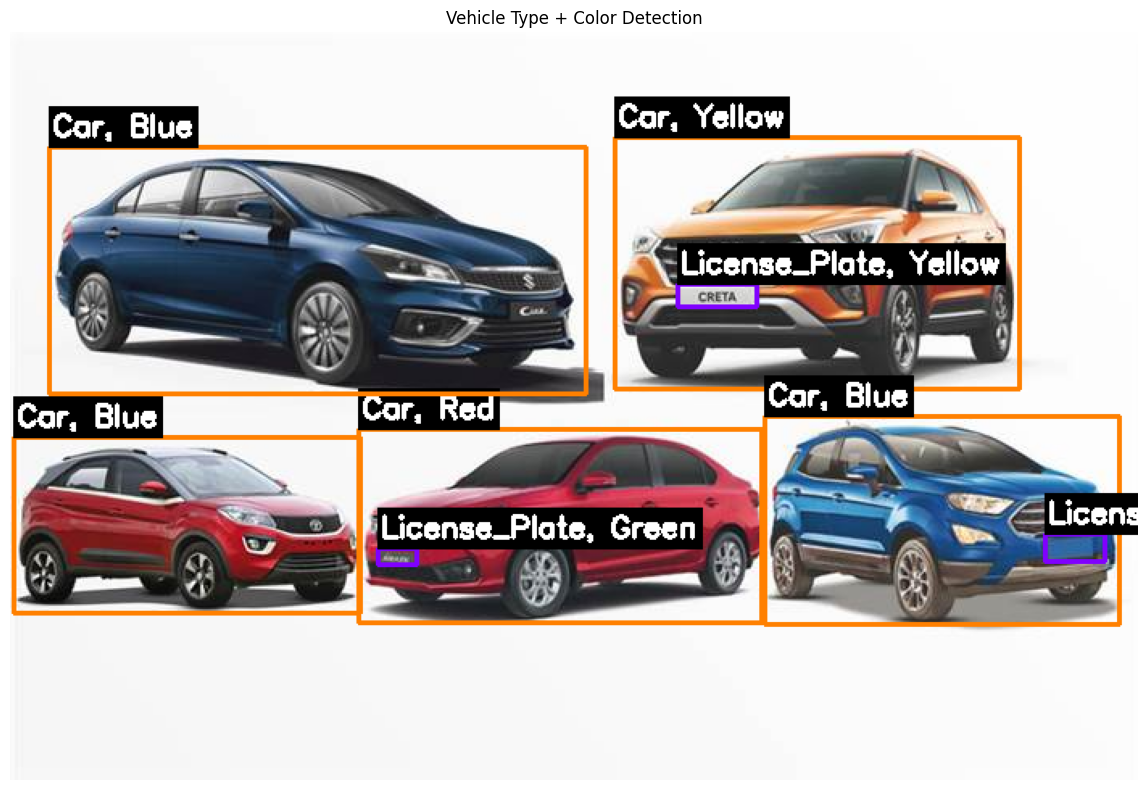

In [17]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load YOLO model (vehicle type + license plate detection)
model = YOLO("C:\\Users\\ADMIN\\Desktop\\Project_ANPR\\runs\\detect\\train2\\weights\\best.pt")

# Load image
image_path = "Test_images\\image_8.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_image = image.copy()

# Run detection
results = model(image_path)

# Simple color classification based on Hue
def classify_color(hue):
    if hue < 10 or hue > 160:
        return "Red"
    elif 10 <= hue < 25:
        return "Orange"
    elif 25 <= hue < 35:
        return "Yellow"
    elif 35 <= hue < 85:
        return "Green"
    elif 85 <= hue < 125:
        return "Blue"
    elif 125 <= hue < 160:
        return "Purple"
    else:
        return "Unknown"

# Define bounding box colors
COLORS = [(0, 255, 0), (255, 0, 0), (0, 128, 255), (255, 128, 0), (128, 0, 255)]

for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls = int(box.cls[0])
        conf = float(box.conf[0])
        class_name = model.names[cls]

        # Crop detected vehicle/region
        vehicle_crop = original_image[y1:y2, x1:x2]
        h_crop, w_crop, _ = vehicle_crop.shape

        # Focus on center region (to reduce noise from tires/windows/etc.)
        cx1 = int(w_crop * 0.2)
        cx2 = int(w_crop * 0.8)
        cy1 = int(h_crop * 0.3)
        cy2 = int(h_crop * 0.7)
        center_crop = vehicle_crop[cy1:cy2, cx1:cx2]

        # Convert to HSV and get average hue from center region
        hsv_crop = cv2.cvtColor(center_crop, cv2.COLOR_BGR2HSV)
        avg_hue = int(cv2.mean(hsv_crop)[0])
        color_name = classify_color(avg_hue)

        # Draw bounding box and label
        color = COLORS[cls % len(COLORS)]
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), color, 2)

        label = f"{class_name}, {color_name}"
        (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 1)
        cv2.rectangle(image_rgb, (x1, y1 - 25), (x1 + w + 4, y1), (0, 0, 0), -1)
        cv2.putText(image_rgb, label, (x1 + 2, y1 - 7), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

# Show results
plt.figure(figsize=(12, 8))
plt.imshow(image_rgb)
plt.title("Vehicle Type + Color Detection")
plt.axis("off")
plt.tight_layout()
plt.show()
